## Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading data from iris.csv dataset

In [2]:
df = pd.read_csv("Iris.csv")

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.shape

(150, 5)

## Remove the 'Id' column as it has no use in the process

In [4]:
df.drop('Id',axis=1,inplace=True)

## Reading the features into the 'x' variables and target 

In [23]:
x = df.iloc[:,:-1]
y = df['Species'].values


## Performing train test split on the dataset

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

## Importing the decision Tree classifier from sklearn and fitting it on the test data

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)


## Using the trained model to make predictions on the unseen data

In [ ]:
pred1 = dtree.predict(x_test)

## Checking the performance of the model

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))
print(accuracy_score(y_test,pred1))

[[ 9  0  0]
 [ 0  9  0]
 [ 0  2 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.83      0.91        12

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.95      0.93      0.93        30

0.9333333333333333


## Visualizing the model graphically

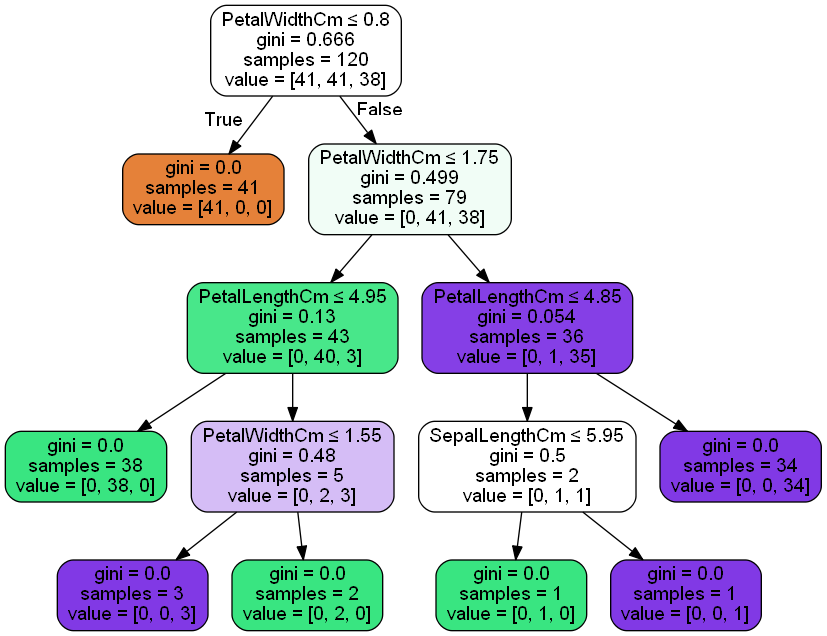

In [39]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[:-1])
dot_data = StringIO()
export_graphviz(dtree,out_file = dot_data,feature_names =features,filled = True, rounded=True,
                special_characters=True)
Graph   = pydot.graph_from_dot_data(dot_data.getvalue())
Image(Graph[0].create_png()) 
